<a href="https://colab.research.google.com/github/Madhusti-D/ML-CS-5783/blob/Assignment_1/Assignment_1_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Locally Weighted Linear Regression

Formulaes implemented are :

Compute weight matrix:

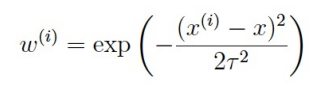

Theta Computation Formula:


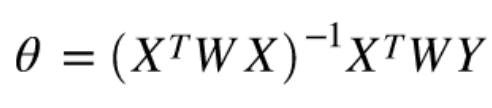

**Answers for the question**

1. We do not need any non-linear because we are directly using local polynomial
   functions

2. Locally weighted linear regression is non parametric algorithm and they doesn't require training phase as in the question 1 where we have to train the model. This algorithm is simple to make predictioons for non-linear features or data.

>   Linear regression uses the same theta values for all data queries and corresponding errors affect the linear prediction in learning phase.

>   Locally weighted regression uses linear prediction to learn locally good fit and far distanced errors do not affect the local prediction as in the linear regression







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


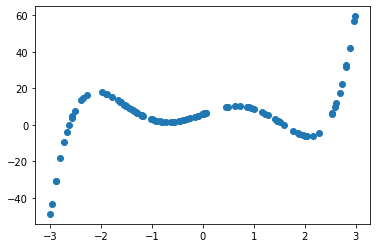

100


In [ ]:
X_train = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/x_train.npy')
Y_train = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/y_train.npy')

X_train = X_train.tolist()
Y_train = Y_train.tolist()

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
Y_train = Y_train.reshape(100,1)

plt.scatter(X_train,Y_train)
plt.show()
m = X_train.shape[0]
print(m)

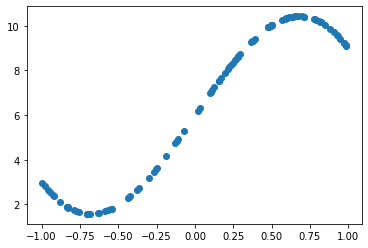

In [ ]:
X_test = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/x_test.npy')
Y_test = np.load('/content/drive/MyDrive/CS5783 Assignment/Assignment 1/y_test.npy')


X_test = X_test.tolist()
Y_test = Y_test.tolist()

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

plt.scatter(X_test,Y_test)
plt.show()

N - Number of features; This dataset has only one feature

m - Number of training examples

X_train - input features

Y_train - output / target values

_pt_x - The point for which prediction has to be made

_pt_x(i) - ith training example

tau - Bandwidth parameter

In [ ]:
def weights_mat_cal_fn(_pt_x , X_train, tau):

  m = X_train.shape[0]

  #Weight Matrix is a diagonal matrix and also we need to initialise it as identity matrix

  Weight_matrix = np.mat(np.eye(m))

  #Calculation of weights for all training data

  for i in range(m):
    _pt_x_i = X_train[i]
    denom = (-2 * tau * tau) 
    Weight_matrix[i,i]=np.exp(np.dot((_pt_x_i -_pt_x),(_pt_x_i -_pt_x).T)/denom)

  return Weight_matrix

In [ ]:
def prediction_fn (X_train, Y_train, _pt_x, tau):
  m = X_train.shape[0]
  # To add bias term adding ones to the columns
  X_Append = np.append(X_train, np.ones(m).reshape(m,1), axis = 1)

  # Point in X_train for which prediction has to be performed
  pt_X_ = np.array([_pt_x,1])

  weights_matrix = weights_mat_cal_fn(pt_X_, X_Append, tau)

  #Parameter or theta calculation
  Param = np.linalg.pinv(X_Append.T*(weights_matrix*X_Append))*(X_Append.T*(weights_matrix * Y_train))

  #Calculating predictions
  prediction = np.dot(pt_X_, Param)

  return Param, prediction




no_of_pts - Number of points we need to predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


Tau value is 0.5


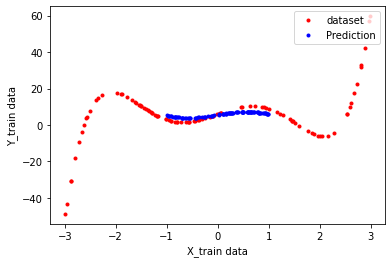

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


Tau value is 0.1


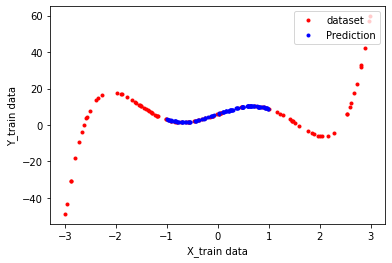

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


Tau value is 0.08


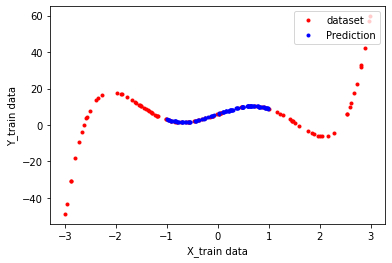

In [ ]:
def plot_prediction_fn(X_train, Y_train, X_test, tau, no_of_pts):
  predictions_test=[]

  for _pt_x in X_test:
    Param,prediction = prediction_fn(X_train,Y_train,_pt_x, tau)
    predictions_test.append(prediction)

  #Reshaping
  X_test=np.array(X_test).reshape(no_of_pts,1)
  predictions_test = np.array(predictions_test).reshape(no_of_pts,1)

  #Plotting
  plt.plot(X_train,Y_train, 'r.', label="dataset")
  plt.plot(X_test,predictions_test, 'b.', label = "Prediction")
  print("Tau value is", tau)
  plt.legend(loc = 'upper right')
  plt.xlabel ('X_train data')
  plt.ylabel ('Y_train data')
  plt.show()

plot_prediction_fn(X_train,Y_train, X_test, tau = 0.5, no_of_pts=100)
plot_prediction_fn(X_train,Y_train, X_test, tau = 0.1, no_of_pts=100)
plot_prediction_fn(X_train,Y_train, X_test, tau = 0.08, no_of_pts=100)